In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import mglearn

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False   # 마이너스 부호 깨짐

## 2.3.6 결정 트리의 앙상블

- 앙상블: 여러 머신러닝 모델을 연결해 더 강력한 모델 만드는 기법
- random forest, gradient boosting 결정 트리가 대표적

### 랜덤 포레스트

- 결정 트리의 overfitting 문제 해결
- 여러 결정 트리 만들어 결과를 평균 혹은 투표
- 랜덤하게 트리 생성
  - 트리 작성시 사용하는 데이터 포인트 무작위 선택
  - 분할 테스트에서 특성을 무작위 선택

### 랜덤 포레스트 구축
- 부트스트랩 샘플 : n_sample개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출

### 랜덤 포레스트 분석

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,
                                                random_state=42)

forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

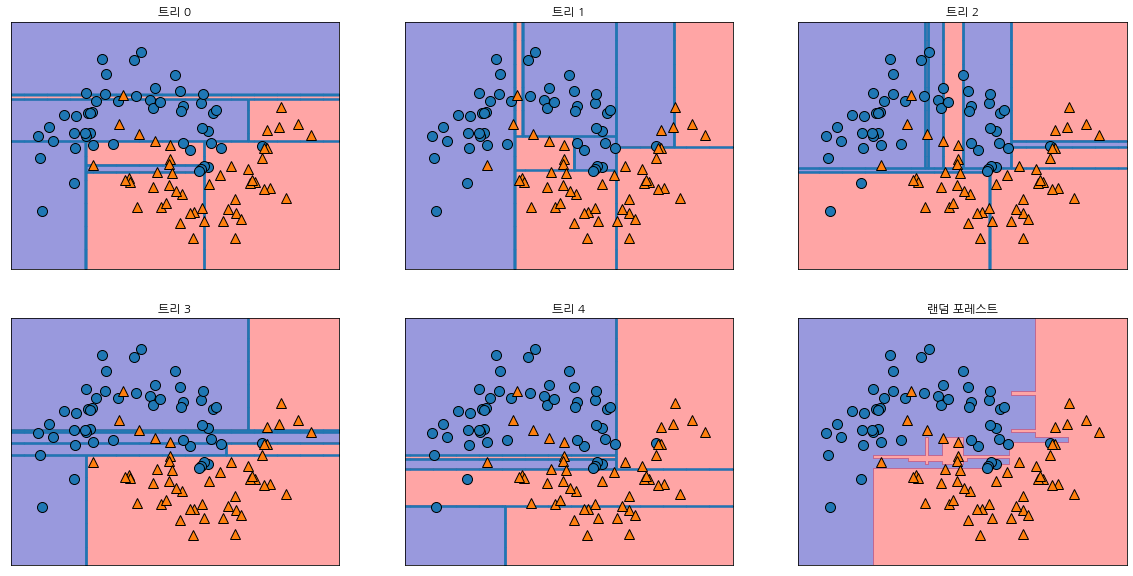

In [5]:
fig,axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(X,y,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(forest,X,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('랜덤 포레스트')
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.show()

In [9]:
cancer = load_breast_cancer()

In [10]:
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data,cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

print('훈련 세트 정화도: {:.3f}'.format(forest.score(X_train,y_train)))
print('테스트 세트 정화도: {:.3f}'.format(forest.score(X_test,y_test)))

훈련 세트 정화도: 1.000
테스트 세트 정화도: 0.972


In [13]:
def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1,n_features)

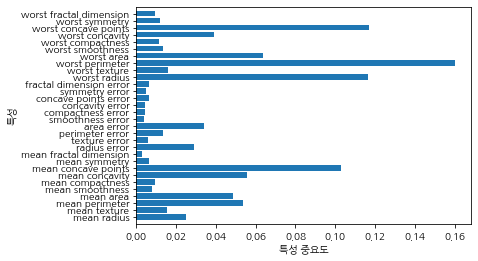

In [14]:
plot_feature_importance_cancer(forest)

### Random Forest 정리
- 텍스트 데이터와 같은 고차원이며 희소한 데이터에는 잘 작동하지 않음
  - 선형 모델이 더 적합
- 매운 큰 데이터 셋헤도 잘 작동하나, 선형모델보다 많은 메모리 사용해 훈련과 예측이 느림
  - 속도와 메모리 사용에 제약이 있는 app의 경우 선형 모델이 적합
- max_features: 각 트리가 얼마나 무작위가 될지 결정, 일반적으로 기본값 사용
  - 분류: max_features = sqrt(n_features)
  - 회귀: max_features = n_features

### 그래디언트 부스팅 회귀 트리

- 이전 트리의 오차를 보완하는 방식으로 트리 순차적으로 생성
- 보통 무작위성 없음, 강력한 가지치기 사용
- 보통 1~5개 정도의 약학습기 사용
  - 약학습기 많이 추가될수록 성능 좋아짐
- 메모리 적게 사용, 예측 빠름
- learnin_rate: 이전 오차를 얼마나 강하게 보정하는가
  - 값이 클수록 복잡한 모델 생성
- n_estimators: 약학습기 개수
  - 클수록 앙상블에 트리가 추가돼 모델의 복잡도 커지고 훈련 세트에서의 실수 바로잡을 기회 더 많아짐

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test,y_train,y_test = train_test_split(
    cancer.data,cancer.target,random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train,y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [16]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print('훈련 세트 정화도: {:.3f}'.format(gbrt.score(X_train,y_train)))
print('테스트 세트 정화도: {:.3f}'.format(gbrt.score(X_test,y_test)))

훈련 세트 정화도: 0.991
테스트 세트 정화도: 0.972


In [17]:
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print('훈련 세트 정화도: {:.3f}'.format(gbrt.score(X_train,y_train)))
print('테스트 세트 정화도: {:.3f}'.format(gbrt.score(X_test,y_test)))

훈련 세트 정화도: 0.988
테스트 세트 정화도: 0.965


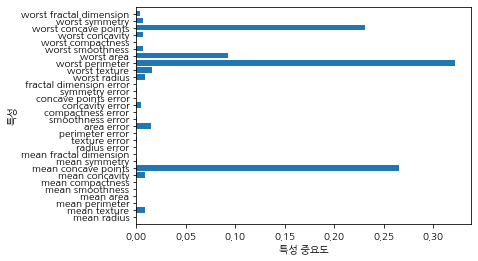

In [18]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importance_cancer(gbrt)

### 장단점과 매개변수

- 장점:
  - 특성 스케일 조절하지 않아도 됨
  - 이진 특성이나 연속적인 특성에도 잘 작동함
- 단점:
  - 배개변수를 잘 조정해야 함
  - 훈련 시간이 길다
  - 희소한 고차원 데이터에는 잘 작동하지 않음
- 매개변수
  - n_estimators : 트리 개수 지정
  - learning_rate : 이전 트리의 오차를 보정하는 정도를 조절
  - 일반적으로 n_estimators를 맞추고 나서 적절한 learning_rate를 찾음